# Richter’s Predictor

Kyongmin So 

##### Business Problem:
----------------------------------------------------------------------------
I am predicting which homes will receive the worst damages from an earthquake so the government and different organizations can be aware of what homes to go out and try to restructure the homes.  

Making our necessary imports.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
import pickle
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,\
    precision_score, recall_score, accuracy_score, f1_score, log_loss,\
    roc_curve, roc_auc_score, classification_report, plot_roc_curve

When I first got this dataset, I was given a variety of datasets and I thought about digging into each one. 

In [2]:
#You don't need to worry about this data. Unless you're submitting. This is just a formatting thing
submission_format = pd.read_csv('../Data/submission_format (1).csv')
submission_format

,building_id,damage_grade
0,300051,1
1,99355,1
2,890251,1
3,745817,1
4,421793,1
...,...,...
86863,310028,1
86864,663567,1
86865,1049160,1
86866,442785,1


The dataset above is for submission purpose only. It's giving us an outline of how we should submit our findings if we wanted to join the competition. This dataframe is of no use to us. 

This dataset was given to us, but we don't have a target value for this dataset. This dataset is no use to us either because we are not submitting this dataframe to the competition. 

In [3]:
#Don't use this either. You don't get target values.
test = pd.read_csv('../Data/test_values (2).csv')
test

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,300051,17,596,11307,3,20,7,6,t,r,...,0,0,0,0,0,0,0,0,0,0
1,99355,6,141,11987,2,25,13,5,t,r,...,1,0,0,0,0,0,0,0,0,0
2,890251,22,19,10044,2,5,4,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,745817,26,39,633,1,0,19,3,t,r,...,0,0,1,0,0,0,0,0,0,0
4,421793,17,289,7970,3,15,8,7,t,r,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86863,310028,4,605,3623,3,70,20,6,t,r,...,1,0,0,0,0,0,0,0,0,0
86864,663567,10,1407,11907,3,25,6,7,n,r,...,0,0,0,0,0,0,0,0,0,0
86865,1049160,22,1136,7712,1,50,3,3,t,r,...,0,0,0,0,0,0,0,0,0,0
86866,442785,6,1041,912,2,5,9,5,t,r,...,0,0,0,0,0,0,0,0,0,0


We are now looking at the data that I will be using.

In [4]:
#Target isn't in this specific dataframe. 
df = pd.read_csv('../Data/train_values (2).csv')
df

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,0,0,0,0,0
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,0,0,0,0,0
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,0,0,0,0,0


### Data Exploration

In [5]:
#Making sure that the numbers were not unique values. 
#This makes us know we should cluster when we are plotting. 
df['geo_level_1_id'].value_counts()

6     24381
26    22615
10    22079
17    21813
8     19080
7     18994
20    17216
21    14889
4     14568
27    12532
13     9608
11     8220
3      7540
22     6252
25     5624
16     4332
0      4011
9      3958
12     3194
18     3189
1      2701
5      2690
30     2686
15     2320
14     1714
24     1310
23     1121
2       931
29      396
19      372
28      265
Name: geo_level_1_id, dtype: int64

In [6]:
#Dropping the building ID column because we already got the same 
#column name in the main dataframe. 
target = pd.read_csv('../Data/train_labels (1).csv')
target = target.drop(columns='building_id')
target

,damage_grade
0,3
1,2
2,3
3,2
4,3
...,...
260596,2
260597,3
260598,3
260599,2


In [7]:
#I now want to combine the main dataframe with the target just so I can 
#get a better visualization of what I am working with.
dataframes = [df, target]

#We are going to be combining our two dataframes off of our columns
combined_df = pd.concat(dataframes, axis = 1)
combined_df

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,0,0,0,0,2
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,0,0,0,0,3
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,0,0,0,0,2


In [8]:
#Making sure whatever is in our columns matches the type they're 
#supposed to be.
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

Now that I have combined our dataframe, I now want to see if there are any null values.

In [9]:
combined_df.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

We noticed that there were no null values which is a huge relief, but there are features that we need explore. For sure we will not have to use all of these features, so we need to know what to keep, and what to drop. 

### Feature Exploration

In [10]:
#Pulling up our dataframe to see again
combined_df

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,0,0,0,0,2
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,0,0,0,0,3
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,0,0,0,0,2


### Building a Heatmap

I want to drop some columns in my dataset and I want to know if there is any correlation between the targets and the features. I will be making a heatmap to see if there is any correlations between them and if they don't have any correlations, I will drop it.

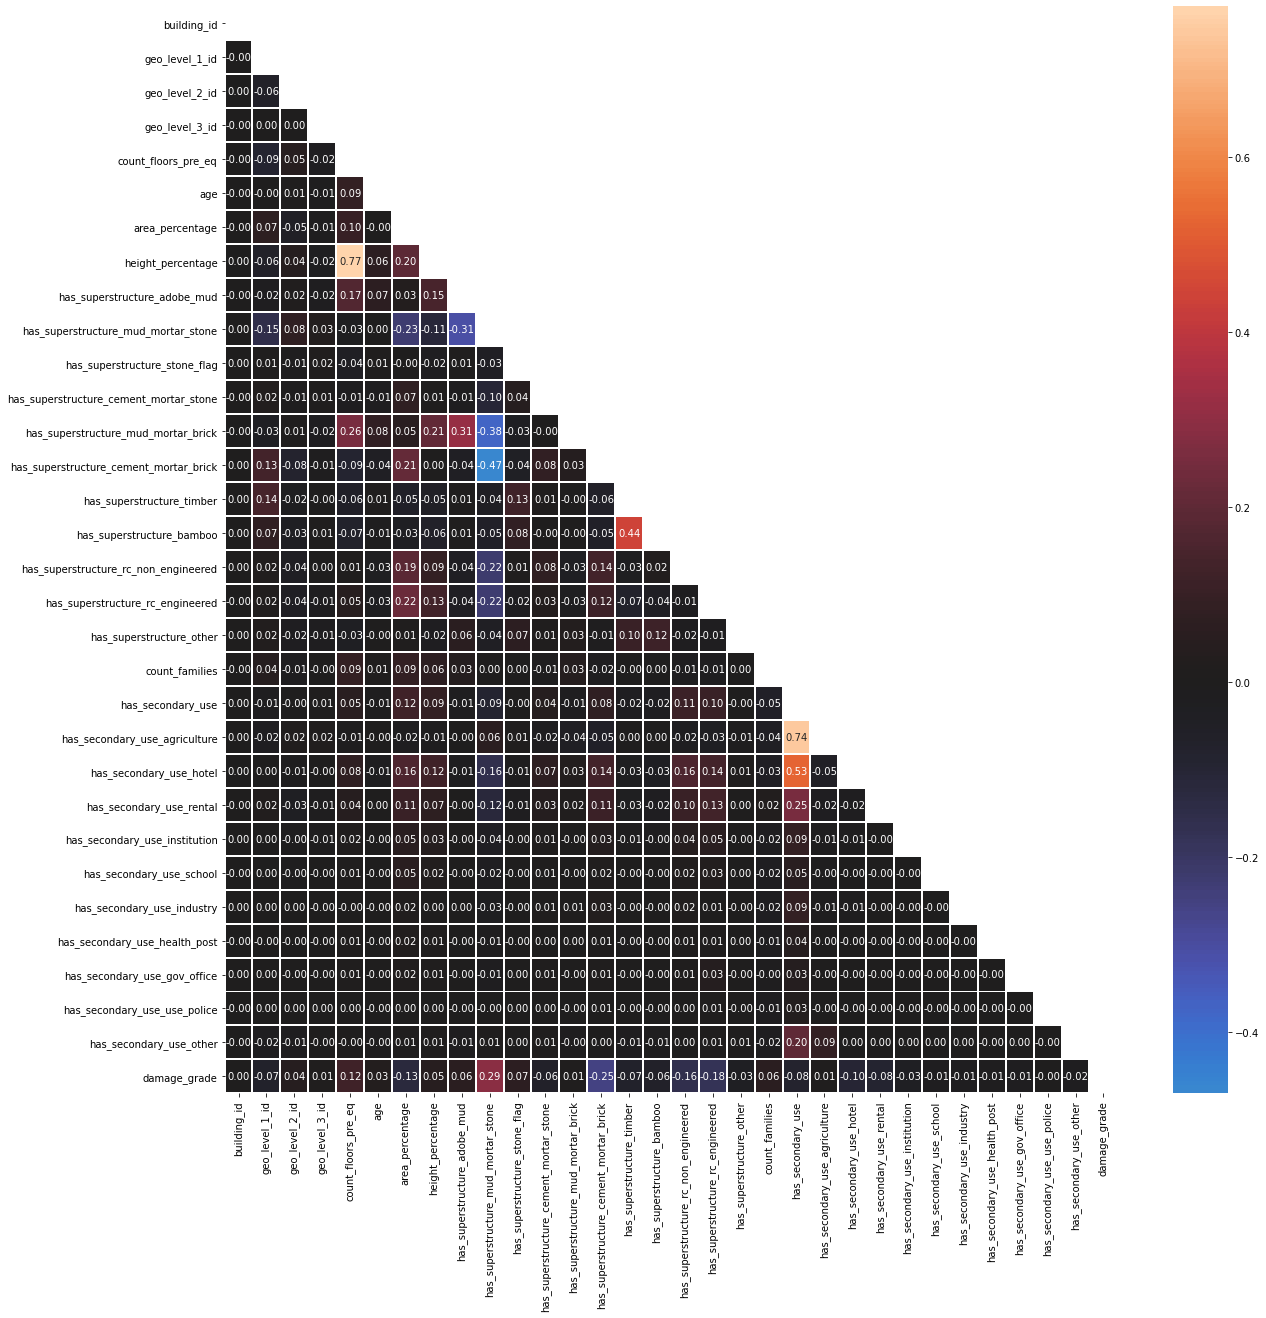

In [11]:
#Make correlation mean (A statistical relationship)
corr_mean = combined_df.corr(method = 'pearson')

#Make sure we don't see the upper half for the heatmap.
mask = np.triu(np.ones_like(corr_mean, dtype=bool))

#Make the actual heatmap.
fig, ax = plt.subplots(figsize=(20,20)) 
ax = sns.heatmap(corr_mean, mask=mask, center=0, linewidths=1, annot=True, fmt=".2f")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_xticklabels())
plt.show()

### Starting to drop our columns

I want to focus on building a model that predicts building damages based off of what the structures are made out of. Therefore, I will drop some columns that that has no connection to the building materials. This will the be the main reasons as to why I will drop some of my columns.

I got my data from this [website](https://www.drivendata.org/competitions/57/nepal-earthquake/page/136/). In this site, it gives us the details for every feature and I need to start determining if each feature is worth keeping or not. 

The website is useful, but it did not go into full detail on what some of the features were. The geo_level columns were one of the examples that I had an issue because what constituted the difference between **geo_level_1_id**	& **geo_level_2_id**? This [website](https://becominghuman.ai/how-to-shine-in-a-data-science-challenge-an-example-from-drivendata-47a526fa38ea) did a better job of explaining the different geo levels. 

From my research: 
- geo_level_1_id
    - City
- geo_level_2_id
    - District
- geo_level_3_id
    - Neighborhood

This was the best explanation I could find on these certain columns. I will be only looking at **geo_level_1_id** because I will only care about the city. 

In [12]:
#I will be dropping geo_level_2 and geo_level_3

combined_df = combined_df.drop(columns=['geo_level_2_id', 'geo_level_3_id'])
combined_df

,building_id,geo_level_1_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,2,30,6,5,t,r,n,f,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,2,10,8,7,o,r,n,x,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,2,10,5,5,t,r,n,f,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,2,10,6,5,t,r,n,f,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,3,30,8,9,t,r,n,f,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1,55,6,3,n,r,n,f,...,0,0,0,0,0,0,0,0,0,2
260597,669485,17,2,0,6,5,t,r,n,f,...,0,0,0,0,0,0,0,0,0,3
260598,602512,17,3,55,6,7,t,r,q,f,...,0,0,0,0,0,0,0,0,0,3
260599,151409,26,2,10,14,6,t,r,x,v,...,0,0,0,0,0,0,0,0,0,2


After dropping our certain columns, we go back to look at our heatmap to see if there's any other correlations.

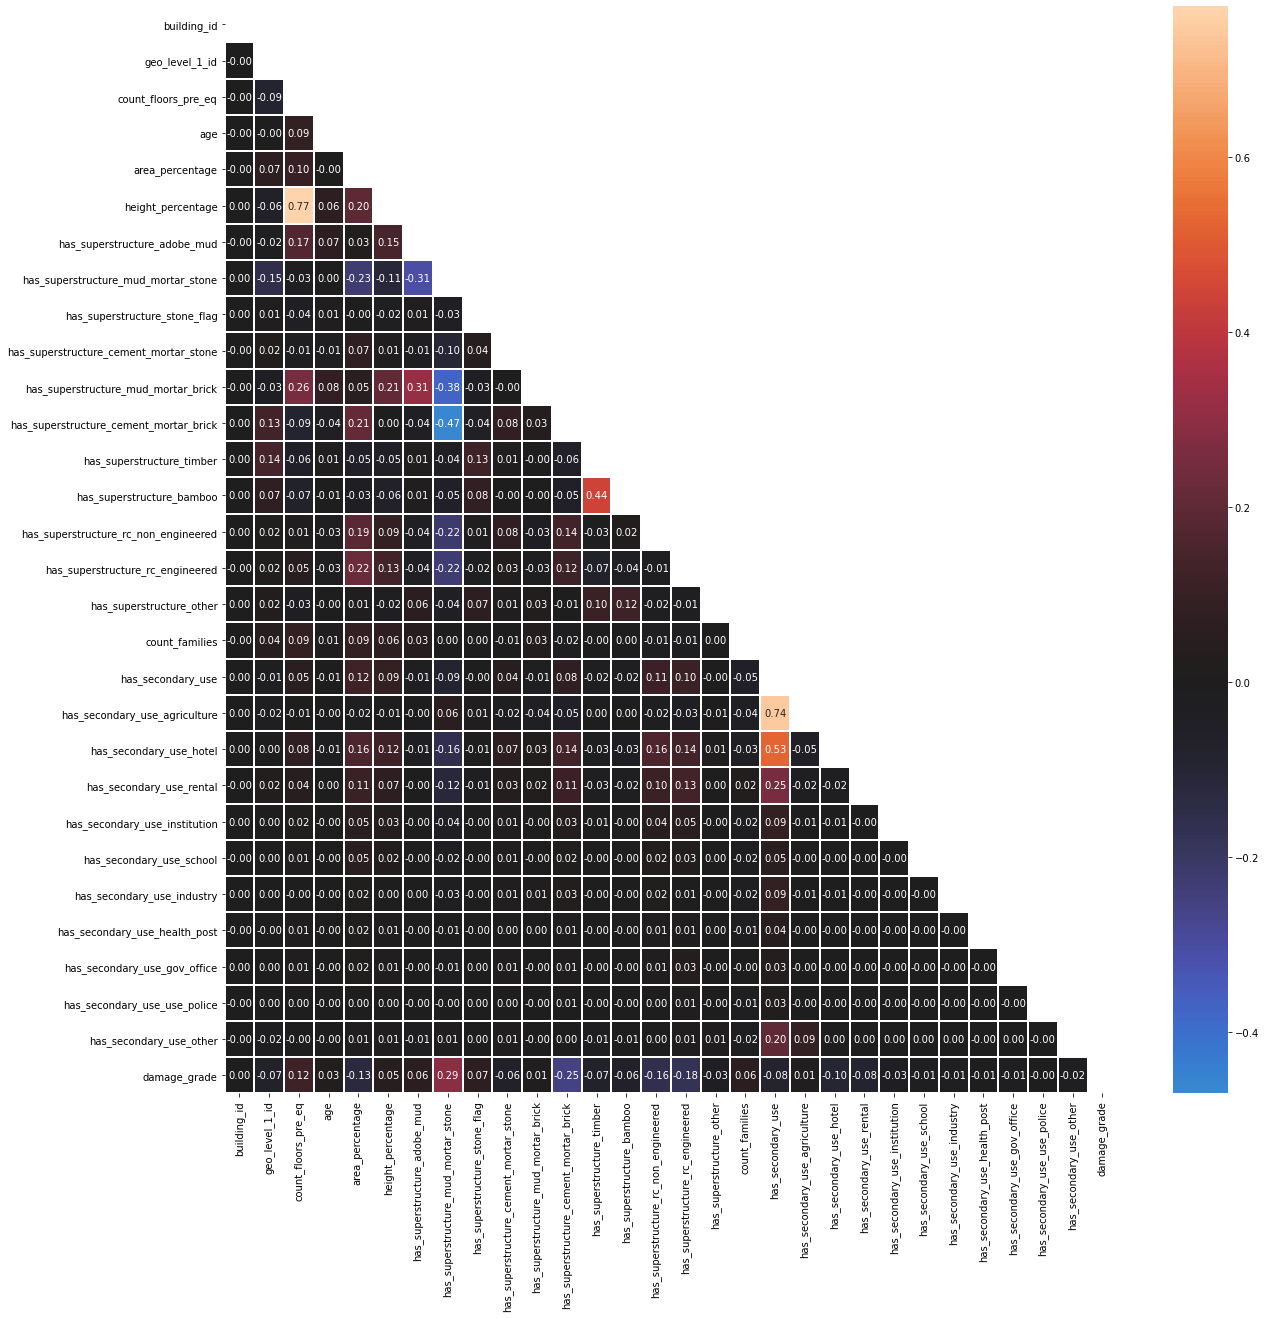

In [13]:
#Make correlation mean (A statistical relationship)
corr_mean = combined_df.corr(method = 'pearson')

#Make sure we don't see the upper half for the heatmap.
mask = np.triu(np.ones_like(corr_mean, dtype=bool))

#Make the actual heatmap.
fig, ax = plt.subplots(figsize=(20,20)) 
ax = sns.heatmap(corr_mean, mask=mask, center=0, linewidths=1, annot=True, fmt=".2f")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_xticklabels())
plt.show()

Looking at this heatmap, I am going to be dropping more features that have no correlations with the target.

In [14]:
#I gotta smote only the 2nd and 1st 
#target.value_counts(normalize=True)